In [230]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [231]:
df_continents = pd.read_csv(
    os.path.join("Data", "continents.csv"), index_col=0
)

display(df_continents)

,article,continent
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Europe
1,%C3%85land,Europe
2,%C3%89douard_Manet,Europe
3,%C3%89ire,Europe
4,%C3%93engus_I_of_the_Picts,Europe
...,...,...
4599,Zionism,Asia
4600,Zirconium,International
4601,Zoroaster,Asia
4602,Zuid-Gelders,Europe


### Colors for all plots

In [232]:
continents = df_continents['continent'].unique()
random_colors = sns.color_palette('husl', n_colors=len(continents))
continents_colors = {}
for i in range(len(continents)):
    continents_colors[continents[i]] = random_colors[i]
print(continents_colors)

{'Europe': (0.9677975592919913, 0.44127456009157356, 0.5358103155058701), 'International': (0.8087954113106306, 0.5634700050056693, 0.19502642696727285), 'North America': (0.5920891529639701, 0.6418467016378244, 0.1935069134991043), 'Australia': (0.19783576093349015, 0.6955516966063037, 0.3995301037444499), 'Asia': (0.21044753832183283, 0.6773105080456748, 0.6433941168468681), 'Africa': (0.22335772267769388, 0.6565792317435265, 0.8171355503265633), 'South America': (0.6423044349219739, 0.5497680051256467, 0.9582651433656727), 'Antarctica': (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)}


### Articles per continent

In [233]:
continents_grouped = df_continents.groupby(['continent']).size()
continents_grouped = continents_grouped.sort_values(ascending=False)
continents_grouped

continent
International    1870
Europe           1245
North America     593
Asia              377
Africa            265
South America     123
Australia         122
Antarctica          9
dtype: int64

Text(0.5, 1.0, 'Count of Categories by Continent')

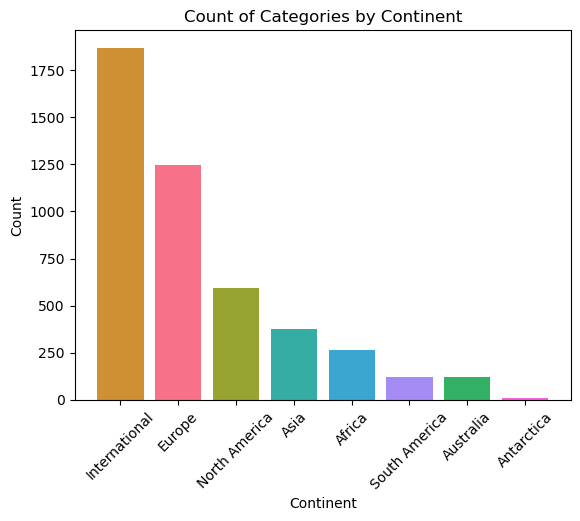

In [234]:
num_categories = len(continents_grouped.keys())
random_colors = sns.color_palette('husl', n_colors=num_categories)
ax = plt.bar(continents_grouped.keys(), continents_grouped.values, color = [continents_colors[continent] for continent in continents_grouped.keys()])
plt.xticks(rotation=45)

plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Count of Categories by Continent')

## Number of articles by category

In [235]:
categories = pd.read_csv(
    os.path.join("Data", "wikispeedia_paths-and-graph", "categories.tsv"),
    delimiter="\t",
    header=None,
    names=["article", "category"],
    skip_blank_lines=True,
    comment="#",
    encoding="UTF-8"
)

display(categories.head())
print("Size:",categories.shape)

,article,category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Countries
3,%C3%85land,subject.Geography.European_Geography.European_...
4,%C3%89douard_Manet,subject.People.Artists


Size: (5204, 2)


In [236]:
articles = pd.merge(categories, df_continents, on="article", how="inner")
articles = articles.fillna("")
display(articles.head())
print("Size:",articles.shape)

,article,category,continent
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...,Europe
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures,Europe
2,%C3%85land,subject.Countries,Europe
3,%C3%85land,subject.Geography.European_Geography.European_...,Europe
4,%C3%89douard_Manet,subject.People.Artists,Europe


Size: (5204, 3)


In [237]:
main_cats = []
for category in articles['category'].values:
    main_cats.append(category.split('.')[1])

articles['main_category'] = main_cats
display(articles)
print("Size:",articles.shape)

,article,category,continent,main_category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...,Europe,History
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures,Europe,People
2,%C3%85land,subject.Countries,Europe,Countries
3,%C3%85land,subject.Geography.European_Geography.European_...,Europe,Geography
4,%C3%89douard_Manet,subject.People.Artists,Europe,People
...,...,...,...,...
5199,Zirconium,subject.Science.Chemistry.Chemical_elements,International,Science
5200,Zoroaster,subject.People.Religious_figures_and_leaders,Asia,People
5201,Zuid-Gelders,subject.Geography.European_Geography,Europe,Geography
5202,Zuid-Gelders,subject.Language_and_literature.Languages,Europe,Language_and_literature


Size: (5204, 4)


In [238]:
articles_cat_continent = articles.groupby(['main_category','continent']).size()
display(articles_cat_continent[('Geography','International')])

163

I have to check this plot

In [239]:
articles_cat_continent

main_category     continent    
Art               Asia               1
                  Europe            13
                  International     24
Business_Studies  Africa             1
                  Asia               6
                                  ... 
Science           Australia         25
                  Europe            33
                  International    944
                  North America     28
                  South America     11
Length: 88, dtype: int64

,History,People,Countries,Geography,Business_Studies,Science,Everyday_life,Design_and_Technology,Music,IT,Language_and_literature,Mathematics,Religion,Art,Citizenship
Africa,30,17,52,143,1,61,2,4,2,0,9,0,1,0,4
Antarctica,0,0,0,7,0,3,0,0,0,0,0,0,0,0,0
Asia,53,51,55,169,6,17,19,11,3,0,14,1,29,1,15
Australia,10,12,15,64,0,25,5,3,2,0,1,0,1,0,1
Europe,313,415,55,287,17,33,51,71,33,2,101,0,41,13,33
North America,53,183,4,166,7,28,51,59,18,4,15,0,5,0,26
South America,9,9,48,85,0,11,0,1,10,0,0,0,0,0,1


Size: (7, 15)


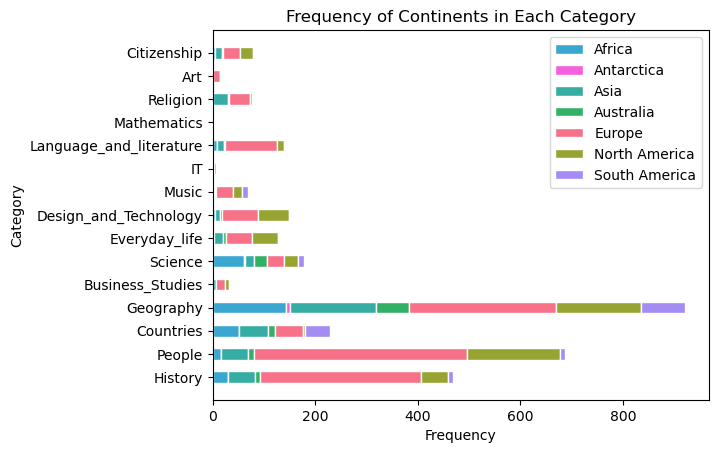

In [240]:
categories = articles['main_category'].unique()
continents = articles['continent'].unique()
continents.sort()

#In case we do not want international
mask = (continents != 'International')
continents = continents[mask]

category_positions = np.arange(len(categories))
bar_width = 0.5

continents_values = {}
for i, continent in enumerate(continents):
    frequencies = []
    for category in categories:
        try:
            value = articles_cat_continent[(category,continent)]
        except KeyError:
            value = 0
        frequencies.append(value)
    continents_values[continent] = frequencies

df_continent_frequencies = pd.DataFrame(continents_values).T
df_continent_frequencies.columns = categories
display(df_continent_frequencies)
print("Size:",df_continent_frequencies.shape)

fig, ax = plt.subplots()

bottom = np.zeros(len(categories))

for continent in continents:
    ax.barh(categories, continents_values[continent], label=continent, color=continents_colors[continent], edgecolor='w', height=0.5, left=bottom)
    bottom += continents_values[continent]

ax.set_yticks(category_positions)
ax.set_yticklabels(categories)
ax.set_xlabel('Frequency')
ax.set_ylabel('Category')
plt.title('Frequency of Continents in Each Category')

# Display legend
plt.legend()

plt.show()


## Length of articles

In [241]:
articles_df = pd.read_csv("Data/wikispeedia_paths-and-graph/articles.tsv", sep="\t",header=None, names=["article"], skiprows=11)
display(articles_df.head())
print("Size:",articles_df.shape)

,article
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,%C3%85land
2,%C3%89douard_Manet
3,%C3%89ire
4,%C3%93engus_I_of_the_Picts


Size: (4604, 1)


In [242]:
# Compute the length and create a new dataframe called analysis_df to be used during the initial analysis

analysis_df = articles_df.copy()

# Specify the path to the folder containing the .txt files
plaintext_path = 'data/plaintext_articles'

# Create an empty list to store the results
word_counts = []

# Iterate through each article in the articles.tsv file
for index, row in analysis_df.iterrows():
    # Construct the full path to the .txt file
    file_path = os.path.join(plaintext_path, row['article'] + '.txt')

    # Read the contents of the .txt file
    with open(file_path, 'r', encoding='utf-8') as file:

        _ = file.readline() # Skip the first line because it contains the word #copyright
        content = file.read()

    # Count the number of words in the article
    word_count = len(content.split())

    # Append the result to the list
    word_counts.append(word_count)

# Add a new column 'WordCount' to the analysis_df
analysis_df['length'] = word_counts

In [243]:
display(analysis_df.head())
print("Size:",analysis_df.shape)

,article,length
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,1877
1,%C3%85land,2453
2,%C3%89douard_Manet,2928
3,%C3%89ire,2067
4,%C3%93engus_I_of_the_Picts,2070


Size: (4604, 2)


In [244]:
# Merge analysis with continents
analysis_df = pd.merge(analysis_df, df_continents, on=["article"])
display(analysis_df.head())
print("Size:",analysis_df.shape)

,article,length,continent
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,1877,Europe
1,%C3%85land,2453,Europe
2,%C3%89douard_Manet,2928,Europe
3,%C3%89ire,2067,Europe
4,%C3%93engus_I_of_the_Picts,2070,Europe


Size: (4604, 3)


In [245]:
#Compute the average length of article for each continent
continent_length = analysis_df.groupby(['continent']).mean('length')
continent_length=continent_length.sort_values('length',ascending=False)
display(continent_length)
print("Size:",continent_length.shape)

,length
continent,
North America,3910.605396
Asia,3884.185676
Europe,3676.203213
South America,2910.780488
Australia,2826.434426
International,2675.104813
Africa,2155.713208
Antarctica,2048.888889


Size: (8, 1)


Text(0.5, 1.0, 'Average length of articles by continent')

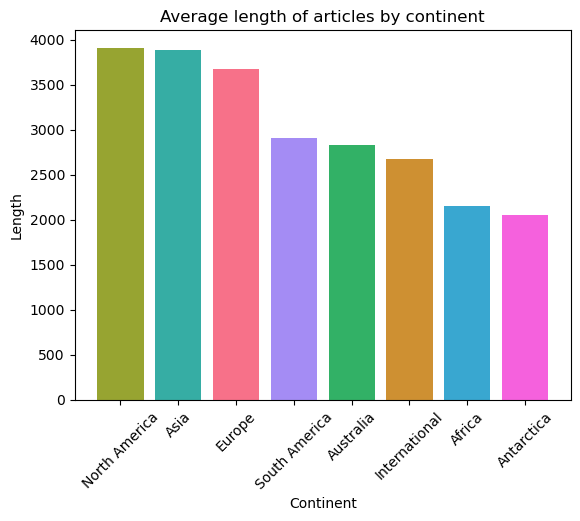

In [246]:
ax = plt.bar(continent_length.index,continent_length.values.reshape(8) , color = [continents_colors[continent] for continent in continent_length.index])
plt.xticks(rotation=45)

plt.xlabel('Continent')
plt.ylabel('Length')
plt.title('Average length of articles by continent')

## Pagerank

In [247]:
# Load pagerank
pagerank_df = pd.read_csv("Data/page_rank.csv")

In [248]:
display(pagerank_df.head())
print("Size:", pagerank_df.shape)
print("Note that the pageRank has less rows!!")


,Article,PageRank
0,United_States,0.014263
1,United_Kingdom,0.007679
2,Scientific_classification,0.007209
3,Europe,0.007043
4,England,0.006815


Size: (4592, 2)
Note that the pageRank has less rows!!


In [249]:
analysis_df = pd.merge(analysis_df, pagerank_df, left_on=["article"], right_on=["Article"], how="left").fillna(0)
analysis_df = analysis_df.drop(["Article"], axis=1)

In [250]:
display(analysis_df.head())
print("Size:", analysis_df.shape)

,article,length,continent,PageRank
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,1877,Europe,0.000033
1,%C3%85land,2453,Europe,0.000033
2,%C3%89douard_Manet,2928,Europe,0.000033
3,%C3%89ire,2067,Europe,0.000033
4,%C3%93engus_I_of_the_Picts,2070,Europe,0.000033


Size: (4604, 4)


In [251]:
# Compute mean
mean_pagerank_continent = analysis_df.groupby("continent").mean("PageRank")
mean_pagerank_continent =mean_pagerank_continent.sort_values(by='PageRank', ascending = False)

Text(0.5, 1.0, 'Average PageRank by continent')

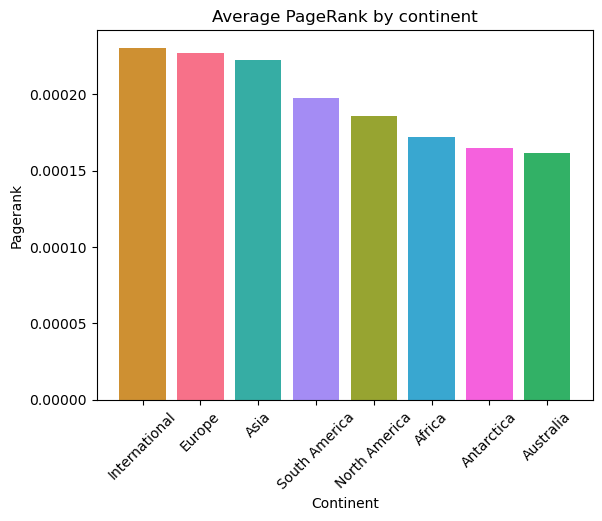

In [252]:
ax = plt.bar(mean_pagerank_continent.index,mean_pagerank_continent['PageRank'] , color = [continents_colors[continent] for continent in mean_pagerank_continent.index])
plt.xticks(rotation=45)

plt.xlabel('Continent')
plt.ylabel('Pagerank')
plt.title('Average PageRank by continent')

## Analysis of paths

Group paths by continents, one path will be assigned to the continent corresponding to the GOAL article

Compute the number of "backclicks" in each path

Compute the length of each path

In [253]:
paths_finished_df = pd.read_csv("Data/wikispeedia_paths-and-graph/paths_finished.tsv", sep="\t", header=None, names = ["hashedIpAddress", "timestamp", "durationInSec", "path", "rating"], skiprows=16)
paths_unfinished_df = pd.read_csv("Data/wikispeedia_paths-and-graph/paths_unfinished.tsv", sep="\t", header=None, names = ["hashedIpAddress","timestamp","durationInSec", "unf_path", "target","motif"],skiprows=17)

# Extract the target article from finished paths
paths_finished_df["target"] = paths_finished_df['path'].apply(lambda x: x.split(';')[-1])

# Count the number of backclicks
paths_finished_df['backclicks'] = paths_finished_df['path'].apply(lambda x: x.count('<'))
paths_unfinished_df['backclicks'] = paths_unfinished_df['unf_path'].apply(lambda x: x.count('<'))

# Compute the length of each path
paths_finished_df['path_steps'] = paths_finished_df['path'].apply(lambda x: x.count(';') + 1 + x.count('<'))
paths_unfinished_df['path_steps'] = paths_unfinished_df['unf_path'].apply(lambda x: x.count(';') + 1 + x.count('<'))

In [254]:
# Merge the paths with the continents

analysis_fin_paths = pd.merge(paths_finished_df, df_continents, left_on="target", right_on="article").drop("article", axis=1)
analysis_unf_paths = pd.merge(paths_unfinished_df, df_continents, left_on="target", right_on="article").drop("article", axis=1)

In [255]:
display(analysis_fin_paths.head())
print("Size:", analysis_fin_paths.shape)

display(analysis_unf_paths.head())
print("Size:", analysis_unf_paths.shape)

,hashedIpAddress,timestamp,durationInSec,path,rating,target,backclicks,path_steps,continent
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,African_slave_trade,0,9,Africa
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,African_slave_trade,0,5,Africa
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,African_slave_trade,0,8,Africa
3,4e97d9af4476607f,1248925083,1141,Police_state;Police;United_States;Washington%2...,5.0,African_slave_trade,1,105,Africa
4,5bbb6c9d7e4c5e75,1249336638,76,Police_state;United_States;North_Africa;Africa...,2.0,African_slave_trade,0,6,Africa


Size: (51318, 9)


,hashedIpAddress,timestamp,durationInSec,unf_path,target,motif,backclicks,path_steps,continent
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout,0,1,North America
1,3b9778c27e2fd461,1301534903,7,Apple,Microsoft,restart,0,1,North America
2,015d33e513b9eecd,1317349802,83,Spanish_Armada;River_Thames;United_Kingdom,Microsoft,restart,0,3,North America
3,54de13c24c04ace9,1317349812,95,Spanish_Armada;England;Industrial_Revolution;T...,Microsoft,restart,0,8,North America
4,50c2acb11dd39f01,1317351547,1830,Spanish_Armada;England,Microsoft,timeout,0,2,North America


Size: (24846, 9)


In [256]:
continent_data = pd.DataFrame()

# Create a column to show the number of articles in each continent
continent_data["n_articles"] = analysis_df.groupby("continent")["article"].count()

# Create column with the average PageRank
continent_data["av_pagerank"] = mean_pagerank_continent['PageRank']

# Create columns for av. backclicks
continent_data["av_fin_backcliks"] =  analysis_fin_paths.groupby("continent")["backclicks"].mean()
continent_data["av_unf_backcliks"] =  analysis_unf_paths.groupby("continent")["backclicks"].mean()

# Create columns for av. path steps
continent_data["av_fin_steps"] =  analysis_fin_paths.groupby("continent")["path_steps"].mean()
continent_data["av_unf_steps"] =  analysis_unf_paths.groupby("continent")["path_steps"].mean()

# Create columns for the number of finished and unfinished paths for each continent
continent_data["fin_paths"] = analysis_fin_paths["continent"].value_counts()
continent_data["unf_paths"] = analysis_unf_paths["continent"].value_counts()
continent_data['per_fin_paths'] = (continent_data["fin_paths"]/(continent_data["fin_paths"]+continent_data["unf_paths"]))*100 # I think not multiplying by 100

In [257]:
continent_data=continent_data.sort_values(by='per_fin_paths',ascending=False)
display(continent_data)
print("Size:", continent_data.shape)

,n_articles,av_pagerank,av_fin_backcliks,av_unf_backcliks,av_fin_steps,av_unf_steps,fin_paths,unf_paths,per_fin_paths
continent,,,,,,,,,
South America,123,0.000198,0.390224,0.484337,6.765224,5.332530,1248,415,75.045099
Asia,377,0.000222,0.252021,0.603288,6.069187,5.646176,4206,1399,75.040143
Africa,265,0.000172,0.358632,0.491111,6.836807,5.416667,2543,900,73.860006
Antarctica,9,0.000165,0.303226,0.500000,6.858065,3.921875,155,64,70.776256
Europe,1245,0.000227,0.317637,0.484470,6.562063,5.448330,12020,5119,70.132446
Australia,122,0.000162,0.303342,0.547030,6.428021,5.559406,778,404,65.820643
International,1870,0.000231,0.478534,0.497525,7.763953,5.715806,25156,13533,65.021065
North America,593,0.000186,0.376631,0.643094,6.855909,6.402058,5212,3012,63.375486


Size: (8, 9)


Text(0.5, 1.0, 'Percentage of finished paths by continent')

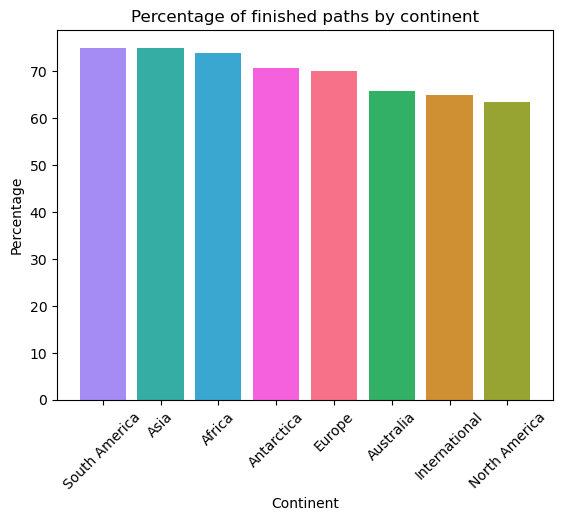

In [258]:
ax = plt.bar(continent_data.index,continent_data['per_fin_paths'] , color = [continents_colors[continent] for continent in continent_data.index])
plt.xticks(rotation=45)

plt.xlabel('Continent')
plt.ylabel('Percentage')
plt.title('Percentage of finished paths by continent')

In [259]:
total_paths = len(paths_finished_df) + len(paths_unfinished_df)

In [260]:
# Create columns to count the number of times each article appears as goal in finished and unfinished paths
analysis_df["n_as_goal_in_fin"] = analysis_df["article"].map(analysis_fin_paths["target"].value_counts()).fillna(0)
analysis_df["n_as_goal_in_unf"] = analysis_df["article"].map(analysis_unf_paths["target"].value_counts()).fillna(0)

# Create columns to count the number of times each article appears in general in finished and unfinished paths
analysis_df["n_in_fin_paths"] = analysis_df["article"].map(pd.Series(';'.join(analysis_fin_paths['path']).split(';')).value_counts()).fillna(0)
analysis_df["n_in_unf_paths"] = analysis_df["article"].map(pd.Series(';'.join(analysis_unf_paths['unf_path']).split(';')).value_counts()).fillna(0)

#Let's calculate the probability of finding an article (we can compare this with the pagerank)
analysis_df["prob_finding"] = (analysis_df["n_in_fin_paths"] + analysis_df["n_in_unf_paths"])/total_paths

In [261]:
display(analysis_df)
print("Size:", analysis_df.shape)

,article,length,continent,PageRank,n_as_goal_in_fin,n_as_goal_in_unf,n_in_fin_paths,n_in_unf_paths,prob_finding
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,1877,Europe,0.000033,0.0,0.0,0.0,0.0,0.000000
1,%C3%85land,2453,Europe,0.000033,0.0,0.0,2.0,2.0,0.000052
2,%C3%89douard_Manet,2928,Europe,0.000033,0.0,0.0,2.0,5.0,0.000092
3,%C3%89ire,2067,Europe,0.000033,0.0,0.0,3.0,10.0,0.000171
4,%C3%93engus_I_of_the_Picts,2070,Europe,0.000033,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
4599,Zionism,9453,Asia,0.000140,10.0,2.0,19.0,8.0,0.000354
4600,Zirconium,1509,International,0.000105,19.0,2.0,30.0,4.0,0.000446
4601,Zoroaster,2919,Asia,0.000070,4.0,1.0,13.0,7.0,0.000262
4602,Zuid-Gelders,319,Europe,0.000121,8.0,3.0,8.0,2.0,0.000131


Size: (4604, 9)


In [262]:
# To do: Some plots
# Show the frequency of the articles